# ***Recognition of handwritten Digits on MNIST dataset using KNN classification***


##importing the libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##Data Preprocessing

In [29]:
 df =  pd.read_csv('train.csv')
 print(df.shape)

(19999, 785)


In [30]:
data = df.values
print(data.shape)
print(type(data))

(19999, 785)
<class 'numpy.ndarray'>


In [31]:
X = data[:,:-1]
Y = data[:,-1]

print(X.shape,Y.shape)

(19999, 784) (19999,)


In [0]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [42]:
y_train[5]


2

##Visualizing some sample images

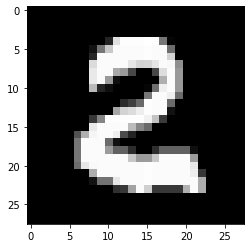

In [41]:
def imgshow(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

imgshow(x_train[5])

## Building the KNN

In [0]:
def dist(x,y):
    return np.sqrt(sum((x-y)**2))

In [0]:
def knn(X,Y,query_point,k=5):
    vals=[]
    m= X.shape[0]

    for i in range(m):
        d = dist(query_point,X[i])
        vals.append((d,Y[i]))

    vals = sorted(vals)
    vals=vals[:k]
    vals = np.array(vals)
    # print(vals)
    new_vals = np.unique(vals[:,1],return_counts=True)
    # print(new_vals)
    index = new_vals[1].argmax()
    pred =  new_vals[0][index]
    return pred

## Make Predictions

In [54]:
pred = knn(x_train,y_train,x_test[9])
print(int(pred))

8


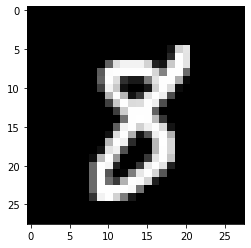

8

In [58]:
imgshow(x_test[9])
y_test[9]

## Evaluating the Accuracy

In [60]:
correct_pre=0
for i in range(4000):
    if y_test[i]== int(knn(x_train,y_train,x_test[i])):
        correct_pre+=1
print(correct_pre/x_test.shape[0])

KeyboardInterrupt: ignored